## Clustering & PCA Assignment

In [622]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [623]:
#Data source: Please change the file path as per the requirement
df =pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_2_Machine_Learning_1\Assignment_Clustering_PCA\Country_data.csv")

In [624]:
#Conversion columns from % to absolute data 
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [625]:
# some basic exploratory analysis about the dataset,i.e df.head() & df.shape()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [626]:
df.shape

(167, 10)

In [627]:
df_final = df.copy()

In [628]:
# Remove the country column from the dataset in order to perform PCA on the dataset. However, store the values in a variable for further use
country = df.pop('country')

In [629]:
# Recheck the dataset
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [630]:
# Adding a unique Identifier to the dataset. Though we have country column which can be leveraged,but yet adding an extra ID column as a best prectice.
df['ID'] = df.index+100

In [631]:
#check the dataset for null i.e, df.info(), df.isnull.sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
ID            167 non-null int64
dtypes: float64(7), int64(3)
memory usage: 13.1 KB


In [632]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ID            0
dtype: int64

In [633]:
# For further steps, we need to drop the ID column which we incorporated. However, we will be storing it in a variable for further use
id=df.ID

In [634]:
df1=df.drop('ID',axis=1)

In [635]:
#Recheck the dataset
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [636]:
#The result of the PCA technique can be affected if the dataset's features are not properly scaled. We will be using
#StandardScaler() to standardize the scale of the features in a unit scale (mean =0 and variance = 1).
standardscaler = StandardScaler()
df2 = standardscaler.fit_transform(df1)

In [637]:
#import and use PCA
from sklearn.decomposition import PCA

In [638]:
pca = PCA(svd_solver='randomized',random_state=42)

In [639]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [640]:
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [641]:
# Let us look at Principle components of PCA
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [642]:
#Now let us look at how  much percentage of variance can be attributed to each of the Principle Component
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

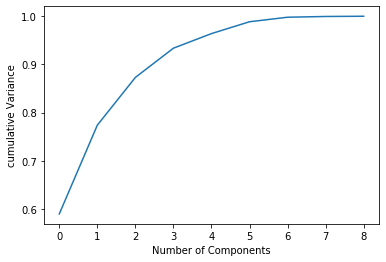

In [643]:
#scree plot: The above mentioned 'explained_variance_ratio' can be visualized by this plot and we can take a decision on how many components we are going to retain for further analysis
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('cumulative Variance')
plt.show()

In [644]:
# From the above graph, it can be seen that 3 components are covering near to 95% of the data. Hence,take the number of components 3
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)
df_pca = pca_final.fit_transform(df2)

In [645]:
# Update the column names
pca_df2=pd.DataFrame(df_pca)
pca_df2.columns=['PC1','PC2','PC3']
pca_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [646]:
# Check the dataset
pca_df2.shape

(167, 3)

In [647]:
#Bring back the ID column which we preserved in ID variable
pca_df2 = pd.concat([id, pca_df2], axis = 1)

In [648]:
pca_df2.head()

,ID,PC1,PC2,PC3
0,100,-2.637442,1.469038,-0.541359
1,101,-0.022277,-1.431896,-0.020701
2,102,-0.457626,-0.673301,0.961867
3,103,-2.724520,2.174583,0.606687
4,104,0.649849,-1.024374,-0.250103


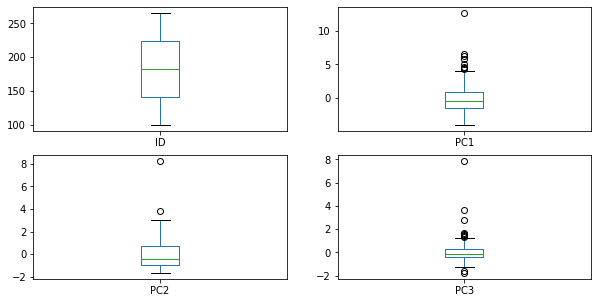

In [649]:
#outlier treatment: We need to check the existence of the outlier here since it can affect the clustering technique
pca_df2.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(2,2), figsize=(10,5), sharex=False, sharey=False)
plt.show()

#We can see that, there are outliers present in the data. However, removing outlier from the total dataset might cause a certain portion of data loss as the source data is not too big. Hence, we will be continue our analysis without removing any rows from the dataset.

In [650]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [651]:
# Check the acquired data is good for cluetering or not through hopkins test
hopkins(pca_df2.drop(['ID'], axis = 1))

0.9513977357123705

In [652]:
df3_1 = pca_df2.drop(['ID'], axis=1).copy()
df3_1.shape

(167, 3)

In [653]:
df3_1.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


### K Means Clustering

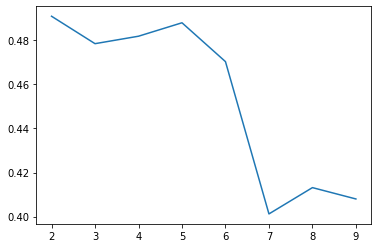

In [654]:
#Let us check for the optimal number of K as well as get the Silhouette Score
from sklearn.metrics import silhouette_score
s = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(df3_1)
    s.append([k, silhouette_score(df3_1, kmeans.labels_)])
plt.plot(pd.DataFrame(s)[0], pd.DataFrame(s)[1])

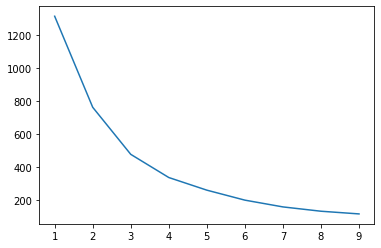

In [655]:
#elbow curve
ss = []
for k in list(range(1,10)):
    kmeans = KMeans(n_clusters = k,max_iter =50).fit(df3_1)
    ss.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [656]:
# From the  Silhouette Score and elbow curve, we can decide that  K = 3 is the number which we can go ahead with
model_clus4 = KMeans(n_clusters =3, random_state = 50)
model_clus4.fit(df3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [657]:
df_km = pd.concat([pca_df2.reset_index().drop('index', axis=1), pd.Series(model_clus4.labels_).reset_index().drop('index', axis=1)], axis = 1)

In [658]:
df_km.columns = ['ID', 'PC1', 'PC2', 'PC3',  'Cluster_ID']
df_km.head()

,ID,PC1,PC2,PC3,Cluster_ID
0,100,-2.637442,1.469038,-0.541359,2
1,101,-0.022277,-1.431896,-0.020701,1
2,102,-0.457626,-0.673301,0.961867,1
3,103,-2.724520,2.174583,0.606687,2
4,104,0.649849,-1.024374,-0.250103,1


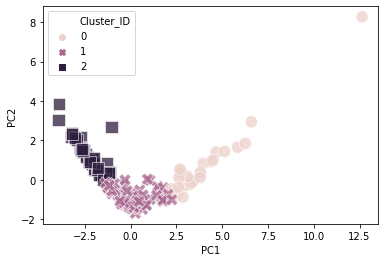

In [659]:
#Visualization of the Cluster Analysis
sns.scatterplot(x = 'PC1', y= 'PC2', hue = 'Cluster_ID',style='Cluster_ID',edgecolors='k',alpha=0.75,s=150, data = df_km)

In [660]:
df_km.Cluster_ID.value_counts() # to check how many countries are there by each cluster

1    92
2    48
0    27
Name: Cluster_ID, dtype: int64

In [661]:
#Merge the original dataset with the processed data with Cluster_ID for profiling
df_New = pd.merge(df, df_km, how = 'inner', on = 'ID')
df_New.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,Cluster_ID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,-2.637442,1.469038,-0.541359,2
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,-0.022277,-1.431896,-0.020701,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,-0.457626,-0.673301,0.961867,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,-2.724520,2.174583,0.606687,2
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,0.649849,-1.024374,-0.250103,1


In [662]:
# Drop the Principle Component Columns here.
df_New.drop(['PC1', 'PC2', 'PC3'], axis = 1, inplace = True)

In [663]:
#Recheck the dataset
df_New.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_ID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,2
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,2
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,1


In [664]:
# Analysis of the data based on 'gdpp', 'child_mort','income'
df_New.groupby('Cluster_ID')[['gdpp', 'child_mort','income']].mean()

,gdpp,child_mort,income
Cluster_ID,,,
0,48759.259259,5.092593,50833.333333
1,8226.869565,20.177174,14169.456522
2,1909.208333,91.610417,3897.354167


From the above table, we can see that, cluster 2 has very low income and low gdpp and very high child mortality

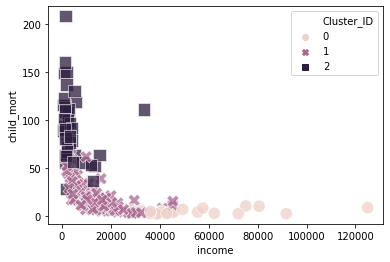

In [665]:
#visualize the dataset for find out which clusters are more important
sns.scatterplot(x = 'income', y= 'child_mort', hue = 'Cluster_ID',style='Cluster_ID',edgecolors='k',alpha=0.75,s=150, data = df_New)

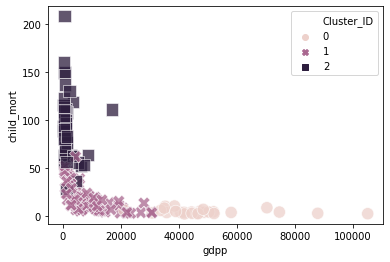

In [666]:
sns.scatterplot(x = 'gdpp', y= 'child_mort', hue = 'Cluster_ID',style='Cluster_ID',edgecolors='k',alpha=0.75,s=150, data = df_New)

 From the above two graphs it can be seen child mortality is very high for the countries where income and gdpp is very low
 and they are visible in cluster number 2. Now, in the next steps, we would be adding the country names back to the dataset
 to check which are the countries are coming in cluster number 2

In [667]:
df_New = pd.concat([df_New,country],axis=1)

In [668]:
df_New.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_ID,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,2,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,1,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,1,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,2,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,1,Antigua and Barbuda


In [669]:
country_cl_1 = list(df_New[df_New.Cluster_ID==2].country)

In [670]:
print(country_cl_1)

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


##### Let us also consider K=5 and do the cluster analysis again

In [671]:
model_clus5 = KMeans(n_clusters =5, random_state = 50)
model_clus5.fit(df3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [672]:
df_km_5 = pd.concat([pca_df2.reset_index().drop('index', axis=1), pd.Series(model_clus5.labels_).reset_index().drop('index', axis=1)], axis = 1)

In [673]:
df_km_5.columns = ['ID', 'PC1', 'PC2', 'PC3', 'Cluster_ID']
df_km_5.head()

,ID,PC1,PC2,PC3,Cluster_ID
0,100,-2.637442,1.469038,-0.541359,0
1,101,-0.022277,-1.431896,-0.020701,2
2,102,-0.457626,-0.673301,0.961867,2
3,103,-2.724520,2.174583,0.606687,0
4,104,0.649849,-1.024374,-0.250103,2


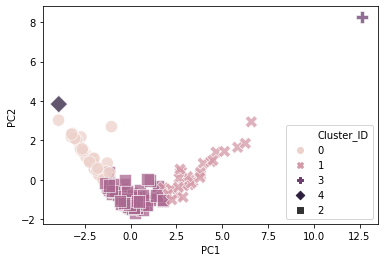

In [674]:
#Visualization of the Cluster Analysis
sns.scatterplot(x = 'PC1', y= 'PC2', hue = 'Cluster_ID',style='Cluster_ID',edgecolors='k',alpha=0.75,s=150, data = df_km_5)

In [675]:
df_km_5.Cluster_ID.value_counts() # to check how many countries are there by each cluster

2    89
0    46
1    30
4     1
3     1
Name: Cluster_ID, dtype: int64

In [676]:
df_km_5.head()

,ID,PC1,PC2,PC3,Cluster_ID
0,100,-2.637442,1.469038,-0.541359,0
1,101,-0.022277,-1.431896,-0.020701,2
2,102,-0.457626,-0.673301,0.961867,2
3,103,-2.724520,2.174583,0.606687,0
4,104,0.649849,-1.024374,-0.250103,2


In [677]:
#Merge the original dataset with the processed data with Cluster_ID for profiling
df_New_5 = pd.merge(df, df_km_5, how = 'inner', on = 'ID')
df_New_5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,Cluster_ID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,-2.637442,1.469038,-0.541359,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,-0.022277,-1.431896,-0.020701,2
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,-0.457626,-0.673301,0.961867,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,-2.724520,2.174583,0.606687,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,0.649849,-1.024374,-0.250103,2


In [678]:
# Drop the Principle Component Columns here.
df_New_5.drop(['PC1', 'PC2', 'PC3'], axis = 1, inplace = True)

In [679]:
df_New_5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_ID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,2
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,2


In [680]:
# Analysis of the data based on 'gdpp', 'child_mort','income'
df_New_5.groupby('Cluster_ID')[['gdpp', 'child_mort','income']].mean()

,gdpp,child_mort,income
Cluster_ID,,,
0,1843.739130,91.965217,3678.760870
1,44103.333333,5.006667,46676.666667
2,7300.808989,21.097753,13447.078652
3,105000.000000,2.800000,91700.000000
4,2330.000000,130.000000,5150.000000


Like k=3 Cluster model, k=5 cluster model also shows the same pattern. Here cluster ID 0 has very low gdpp and low income with high child mortality rate. However, Cluster ID 4 has only one country which also has a very high child mortality as well low income and low gdpp

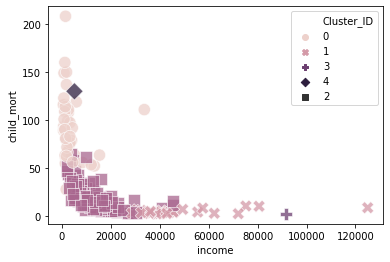

In [681]:
sns.scatterplot(x = 'income', y= 'child_mort', hue = 'Cluster_ID',style='Cluster_ID',edgecolors='k',alpha=0.75,s=150, data = df_New_5)

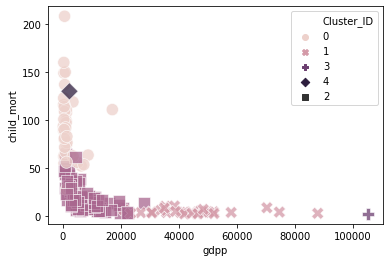

In [682]:
sns.scatterplot(x = 'gdpp', y= 'child_mort', hue = 'Cluster_ID',style='Cluster_ID',edgecolors='k',alpha=0.75,s=150, data = df_New_5)

 From the above two graphs it can be seen child mortality is very high for the countries where income and gdpp is very low
 and they are visible in cluster number 0. Now, in the next steps, we would be adding the country names back to the dataset
 to check which are the countries are coming in cluster number 0

In [683]:
df_New_5 = pd.concat([df_New_5,country],axis=1)

In [684]:
df_New_5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,Cluster_ID,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,2,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,2,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,2,Antigua and Barbuda


In [685]:
country_cl_1_2 = list(df_New_5[df_New_5.Cluster_ID==0].country)

In [686]:
print(country_cl_1_2)

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


## Hierarchical Clustering

In [687]:
# Let us create the Hierarchical Clustering for the same dataset 

In [688]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104


In [689]:
# Considering the necessary columns
df_h = df[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [690]:
# Scale the dataset
scaler_1 = StandardScaler()
df_h_scaled = scaler_1.fit_transform(df_h)
df_h_scaled.shape

(167, 9)

In [691]:
df_h_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [692]:
#df_h_scaled = pd.DataFrame(df_h_scaled)
#df_h_scaled.columns = ['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']
#df_h_scaled.head()

In [693]:
#PCA technique to reduce dimension
pca_1 = PCA(svd_solver='randomized',random_state=42)

In [694]:
pca_1.fit(df_h_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [695]:
pca_1.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [696]:
pca_1.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

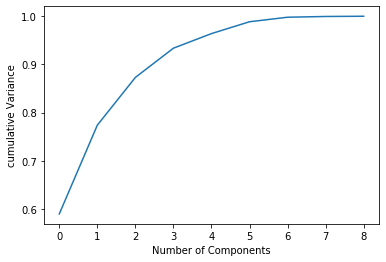

In [697]:
# Scree Plot
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('cumulative Variance')
plt.show()

In [698]:
# From the above graph, it can be seen that 3 components are almost covering 95% of the data. Hence,take the number of components 3
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)
df_pca = pca_final.fit_transform(df_h_scaled)

In [699]:
pca_df2=pd.DataFrame(df_pca)
pca_df2.columns=['PC1','PC2','PC3']
pca_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


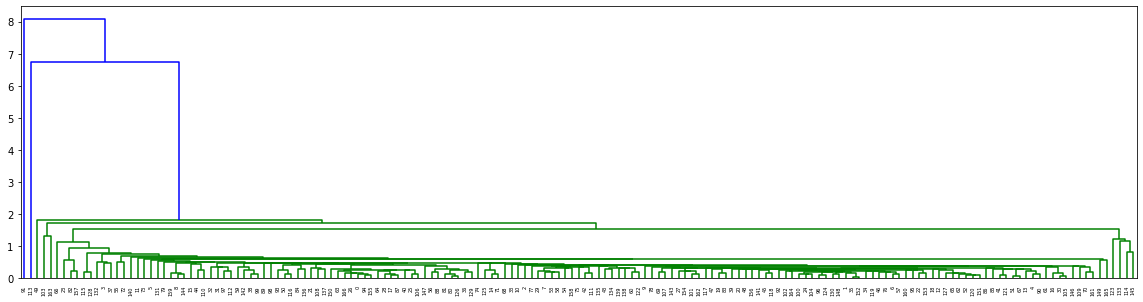

In [700]:
# single linkage Clustering
mergings = linkage(pca_df2, method="single", metric='euclidean')#pca_df2
plt.figure(figsize=(20,5))
dendrogram(mergings)
plt.show()

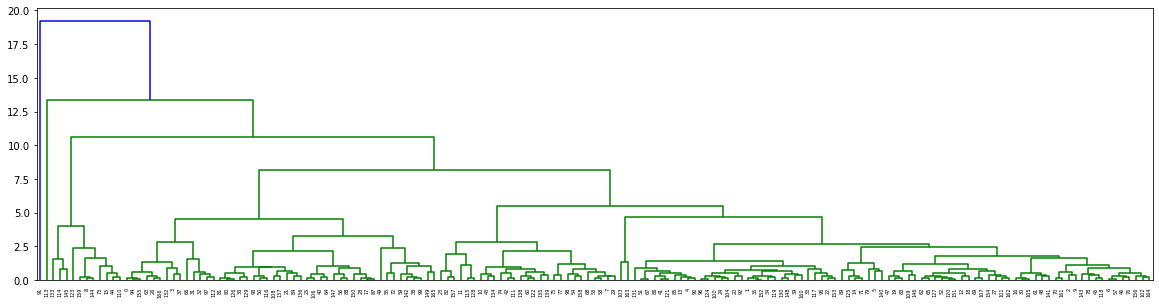

In [701]:
# Complete linkage Clustering
mergings = linkage(pca_df2, method="complete", metric='euclidean')
plt.figure(figsize=(20,5))
dendrogram(mergings)
plt.show()

In [702]:
# From the above Dendrogram generated from Complete Linkage, let us go with 2 clusters for further analysis
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [703]:
df['cluster_labels'] = cluster_labels
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,0


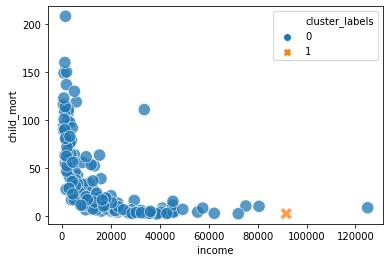

In [704]:
sns.scatterplot(x = 'income', y= 'child_mort', hue = 'cluster_labels',style='cluster_labels',edgecolors='k',alpha=0.75,s=150, data = df)

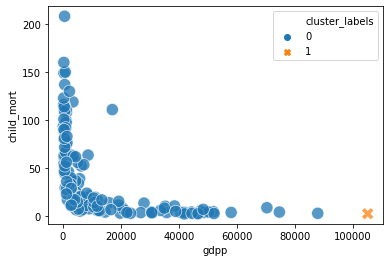

In [705]:
sns.scatterplot(x = 'gdpp', y= 'child_mort', hue = 'cluster_labels',style='cluster_labels',edgecolors='k',alpha=0.75,s=150, data = df)

 From the above two graphs, it can be seen that total data set majorly concentrating towards one cluster

In [706]:
df = pd.concat([df,country],axis=1)

In [707]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_labels,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,0,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,0,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,0,Antigua and Barbuda


In [708]:
# Check the number of line item or countries in each clusters
df.cluster_labels.value_counts()

0    166
1      1
Name: cluster_labels, dtype: int64

In [709]:
country_cl_3 = list(df[df.cluster_labels==0].country)

In [710]:
print(country_cl_3)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwa

In [711]:
df.groupby('cluster_labels')[['gdpp', 'child_mort','income']].mean()

,gdpp,child_mort,income
cluster_labels,,,
0,12409.722892,38.483735,16695.560241
1,105000.000000,2.800000,91700.000000


## Conclusion

The objective of the above analysis was to cluster or make a group similar countries which are in need of help. Figure out a group of countries where the acumulated monetary resource can be utilized in terms of  fighting poverty and providing with basic amenities and relief during the time of disasters and natural calamities

We have performed the Cluster Analysis to do the same in 2 ways.
  - K-means Clustering (Where k is considered as 3 as well as 5)
  - Hierarchical Clustering (Where number of clusters are considered as 2)

In both the cases of K-means clustering, analysis pointing out a set of countries where gdpp and income is low and child mortality is very high. Though there is a little difference in the mean of gdpp, income and child mortality when we compare the similar clusters from K=3 group K=5 group, we can understand that it is those very countries which we should be focusing on where gdpp and income is low and child mortality is high

Both k=3 and k=5 are giving almost same number of countries. However, we would be continuing with k=3 clusters as there are less number of clusters.

From this model of Clustering (k=3), we would be considering the countries which are falling in cluster id 2. 

Hence, we will be focusing on total of 48 countries.

In [712]:
# Hence the final list of countries is:
print(country_cl_1,len(country_cl_1))

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'] 48


In [713]:
country_cl_1 = pd.Series( (v for v in country_cl_1) )

In [714]:

country_cl_1 = pd.DataFrame(country_cl_1)
country_cl_1.columns =[ 'country']
df_final = pd.merge(df_final,country_cl_1,how='inner',on='country')
Final_Country_List =list(df_final.sort_values('gdpp',ascending = True).country)
print(Final_Country_List) # sorter by their gdpp in ascending order

['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Madagascar', 'Mozambique', 'Central African Republic', 'Malawi', 'Eritrea', 'Togo', 'Guinea-Bissau', 'Afghanistan', 'Gambia', 'Rwanda', 'Burkina Faso', 'Uganda', 'Guinea', 'Haiti', 'Tanzania', 'Mali', 'Benin', 'Comoros', 'Chad', 'Kenya', 'Senegal', 'Pakistan', 'Lao', 'Lesotho', 'Mauritania', "Cote d'Ivoire", 'Solomon Islands', 'Yemen', 'Cameroon', 'Ghana', 'Zambia', 'Sudan', 'Kiribati', 'Nigeria', 'Congo, Rep.', 'Angola', 'Timor-Leste', 'Iraq', 'Namibia', 'Botswana', 'South Africa', 'Gabon', 'Equatorial Guinea']
